# GAMASI: Generic Asynchronous Multi-Agent Simulation Invoker

## Running simulation

In [2]:
import numpy as np

from src.Lab import Lab

lab = Lab()

In [3]:
simulation = lab.experiment(
    height=20, width=50,
    initial_population_count=400,
    max_total_duration=30, max_simulation_duration=6
)

Generating universe...	: Done in 0.001 s


Starting population	:   0%|          | 0/400 [00:00<?, ?it/s]

Running simulation	:  33%|███▎      | 2/6 [00:01<00:03,  1.05it/s]

Simulation early stop	: All entities died.
Simulation succeed...	: Returning data... Done in 2.173 s


## Analysis

### Statistics

#### Gathering & computing

In [4]:
data = lab.gather_data(simulation)

Gathering timelines		: 100%|██████████| 702/702 [00:00<00:00, 3879316.74it/s]


In [5]:
data["agents_statistics"]

,generation,parents_count,dead,lifespan,children_count,birth_success,travelled_distance,actions_count,min_decision_duration,max_decision_duration,...,min_action_duration,max_action_duration,mean_action_duration,median_action_duration,std_action_duration,min_round_duration,max_round_duration,mean_round_duration,median_round_duration,std_round_duration
id,,,,,,,,,,,,,,,,,,,,,
0,0,1,True,879292469,1,True,14,43,24065.0,20162469.0,...,1503.0,621658962.0,1.446871e+07,10380.0,9.480030e+07,171573.0,20335325.0,6.011411e+06,5059898.0,5.365304e+06
1,0,1,True,15222741,0,True,0,1,18394.0,18394.0,...,672.0,672.0,6.720000e+02,672.0,NaN,NaN,NaN,NaN,NaN,NaN
2,0,1,True,357237521,1,True,0,3,32000.0,5064522.0,...,5160.0,336695687.0,1.122359e+08,6733.0,1.943879e+08,5247568.0,10078920.0,7.663244e+06,7663244.0,3.416282e+06
3,0,1,True,15763612,0,True,0,3,22743.0,124345.0,...,3767.0,19557.0,1.045300e+04,8035.0,8.167990e+03,286741.0,15275992.0,7.781366e+06,7781366.5,1.059900e+07
4,0,1,True,46269249,0,True,0,8,14628.0,31510.0,...,1011.0,9968.0,6.350500e+03,7163.5,3.283231e+03,185680.0,15089620.0,5.886908e+06,5237909.0,5.294734e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,2,1,True,17553,0,False,-1,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
698,1,1,True,45229999,0,True,4,29,22162.0,6105405.0,...,1062.0,20539.0,7.588897e+03,7454.0,4.968661e+03,187384.0,7002357.0,1.325529e+06,621677.5,1.601574e+06
699,2,1,True,27588064,0,True,4,14,18425.0,62527.0,...,3156.0,25748.0,1.150807e+04,9583.0,6.683726e+03,207411.0,6446829.0,1.983145e+06,1750591.0,1.729021e+06


In [6]:
data["agents_statistics"].to_csv("results/data.csv")

In [7]:
data["population_statistics"]

,min,max,mean,median,std
data,,,,,
lifespan,11001,1161870103,2.944098e+08,1.113856e+08,3.248215e+08
children_count,0,2,4.301994e-01,0.000000e+00,5.704064e-01
birth_success,False,True,8.603989e-01,1.000000e+00,3.468198e-01
travelled_distance,-1,43,3.602564e+00,1.000000e+00,6.158871e+00
actions_count,0,215,2.175783e+01,1.000000e+01,2.963715e+01
mean_decision_duration,16639.0,146127924.0,2.092753e+06,3.999666e+04,1.174760e+07
mean_action_duration,672.0,547770901.0,2.955199e+07,1.234720e+04,6.390544e+07
mean_round_duration,188746.0,251721415.0,1.051311e+07,7.387949e+06,1.645237e+07


#### Plotting some stats

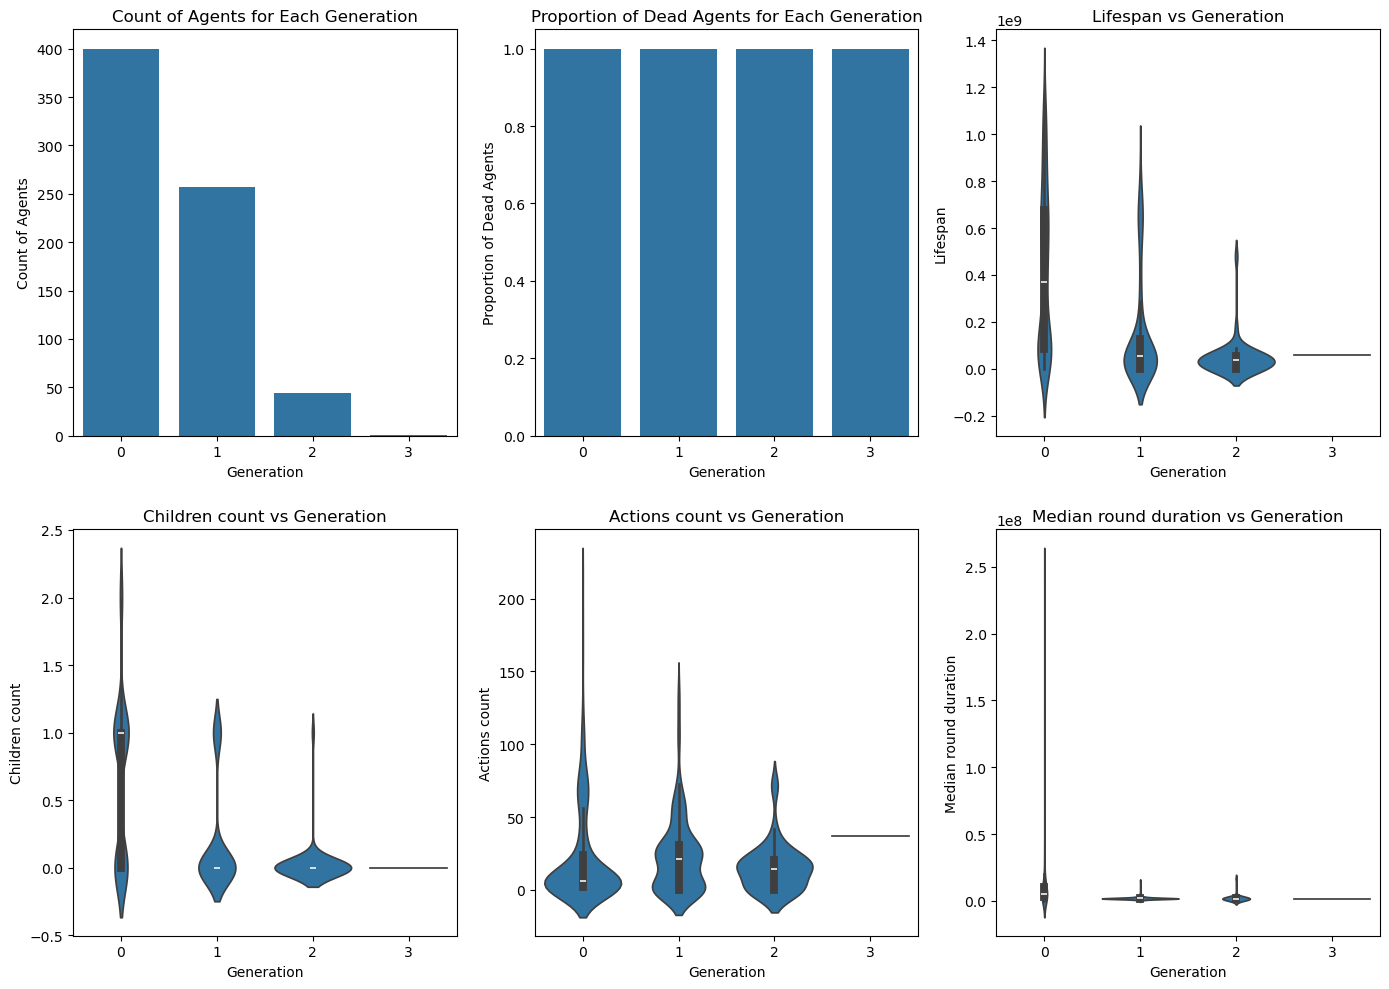

In [8]:
lab.plot_generation_stats(data)

### Timelines

#### Population count

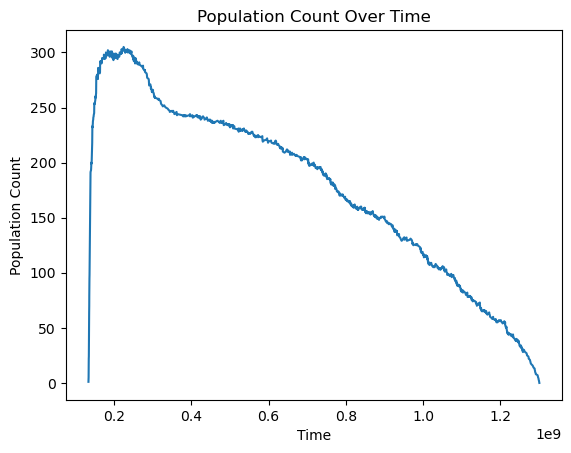

In [9]:
from matplotlib import pyplot as plt  # TODO Move to Lab
data["population_timeline"].plot(y="population_count", legend=False)
plt.title('Population Count Over Time')
plt.xlabel('Time')
plt.ylabel('Population Count')
plt.show()

#### Spatial evolution

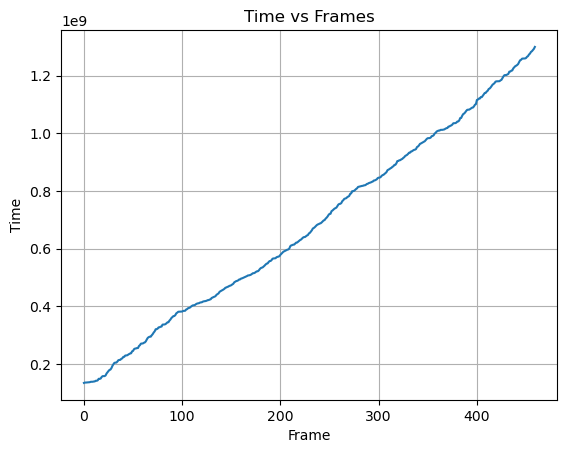

460


In [10]:
import matplotlib.pyplot as plt

positions = data["positions"][0]

plt.plot(range(len(positions)), positions)
plt.xlabel('Frame')
plt.ylabel('Time')
plt.title('Time vs Frames')
plt.grid(True)
plt.show()
print(len(data["positions"][1]))

In [11]:
import imageio


gif_path = "results/output.gif"
imageio.mimsave(gif_path, data["positions"][1], duration=0.01, loop=0)

In [12]:
from IPython.display import HTML
width = 1000
# Generate HTML to display the GIF with specified width and interpolation
html_code = f'<img src="{gif_path}" width="{width}" style="image-rendering: pixelated;">'
HTML(html_code)

In [13]:
import numpy as np
import tifffile

# Assuming 'stack' is your array containing 2D numpy arrays
# 'stack' should be a list or array of 2D numpy arrays

# Convert the list of 2D arrays into a 3D numpy array
stack_3d = np.stack(data["positions"][1], axis=0)

# Save the stack as a TIFF file
tifffile.imwrite('results/stacks/positions.tif', stack_3d)

#### Actions

In [14]:
# TODO

### Relations

In [4]:
from pyvis.network import Network

g = Network(notebook=True)
g.add_nodes([1,2,3], value=[10, 100, 400],
                         title=['I am node 1', 'node 2 here', 'and im node 3'],
                         x=[21.4, 54.2, 11.2],
                         y=[100.2, 23.54, 32.1],
                         label=['NODE 1', 'NODE 2', 'NODE 3'],
                         color=['#00ff1e', '#162347', '#dd4b39'])

g.show('mygraph.html')

mygraph.html


## Miscellaneous

In [15]:
from src.Brain import Abilities

eat = [Abilities.eat_bot, Abilities.eat_right, Abilities.eat_left, Abilities.eat_top]
eating = [a for a in simulation["universe"].population[11].actions if a[2] in eat]
eating_success = [a for a in eating if a[4]]
print(len(simulation["universe"].population[11].actions), len(eating), len(eating_success))
for a in eating_success:
    print(a)

5 3 1
(170424760, 170458073, <Abilities.eat_right: 'eat_right'>, 170478010, True)


In [16]:
max_death_date = 0
last_dead = -1

for a in simulation["universe"].population.values():
    if a.death_date > max_death_date:
        max_death_date = a.death_date
        last_dead = a.id
simulation["universe"].population[last_dead].phenome.color

(132, 13, 133)